# Chapter 2 - End-to-End Machine Learning Project

Here are the main steps we will walk through:
1. [Frame the problem and look at the big picture.](#Frame-the-Problem-and-Look-at-the-Big-Picture)
2. [Get the data.](#Get-the-Data)
3. [Explore the data to gain insights.](#Explore-and-Visualize-the-Data-to-Gain-Insights)
4. [Prepare the data to better expose the underlying data patterns to machine
learning algorithms.](#Prepare-the-Data-for-Machine-Learning-Algorithms)
5. [Explore many different models and shortlist the best ones.]
6. [Fine-tune your models and combine them into a great solution.]
7. [Present your solution.]
8. [Launch, monitor, and maintain your system.]

---

# Frame the Problem and Look at the Big Picture
1. Define the objective in business terms.
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem (supervised/unsupervised,
online/offline, etc.)?
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business
objective?
8. What are comparable problems? Can you reuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

### Frame the Problem
**Understand the Business Objective**
* Identify the true goal: predicting housing prices feeds into a larger investment decision system.
* Importance: Guides problem framing, algorithm choice, performance measures, and optimization effort.

**Current Solution**
* Manual expert estimates based on rules.
* Problems: time-consuming, costly, inaccurate (often off by >30%).
* Motivation: automate predictions using census data (rich, labeled dataset).

**Machine Learning Pipelines:** sequence of asynchronous, self-contained components processing data.
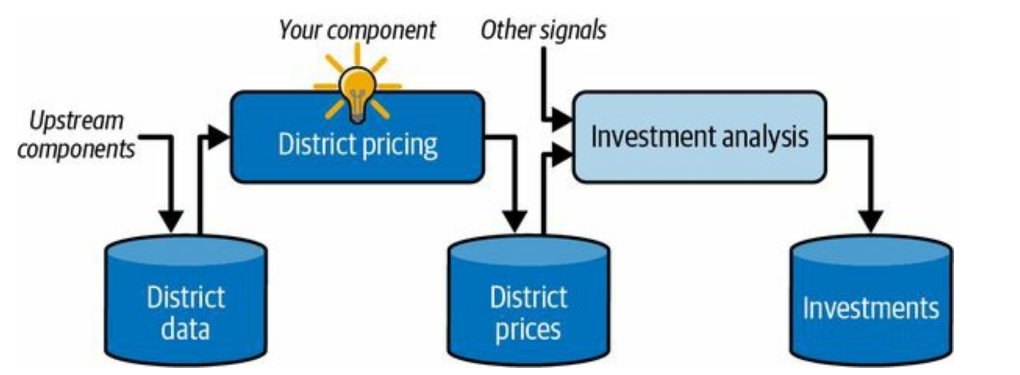
* Advantages:
  * Simplicity & modularity (data flow graph, clear interfaces).
  * Robustness (downstream components can keep running temporarily if upstream fails).
  * Parallel team focus.
* Risks:
  * Failures can go unnoticed, leading to stale data & degraded performance.

**Define the ML Task**

* **Supervision type**: Supervised learning (labeled data available).
* **Task type**: Regression (predicting a numerical value).
  * Multiple regression (many input features).
  * Univariate (single target variable).
* **Learning approach**: Batch learning is sufficient (data fits in memory; no need for real-time adaptation).
* Notes:

  * For large datasets: consider distributed batch (e.g., MapReduce) or online learning.

### Select a Performance Measure

Common measure for regression tasks: **Root Mean Squared Error (RMSE)**
$$
\mathrm{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \big( h(\mathbf{x}^{(i)}) - y^{(i)} \big)^2}
$$

* $m$ is the number of instances in the dataset you are measuring the RMSE on.

* $\mathbf{x}^{(i)}$ is a vector of all the feature values (excluding the label) of the $i$ instance in the dataset.

* $y^{(i)}$ is its label (the desired output value for that instance).

* $\mathbf{X}$ is a matrix containing all the feature values (excluding labels) of all the instances in the dataset. There is one row per instance and the $i$ row is equal to the transpose of $\mathbf{x}^{(i)}$.

* $h$ is your system's prediction function, also called the *hypothesis*. When your system is given an instance's feature vector $\mathbf{x}^{(i)}$, it outputs a prediction value $\hat{y}^{(i)} = h(\mathbf{x}^{(i)})$ for that instance. 

* $\mathrm{RMSE}(\mathbf{X}, h)$ is the cost function measured on the set of examples using your *hypothesis* $h$.


Another common measure and more robust when are many *outliers*: **Mean Absolute Error (MAE)**
$$
\mathrm{MAE}(\mathbf{X}, h) = \frac{1}{m} \sum_{i=1}^{m} |h(\mathbf{x}^{(i)}) - y^{(i)}|
$$

Both functions are ways to measure the distance between two vectors: the vector of predictions and the vector of target values.

Two commonly used metrics are **RMSE** and **MAE**, each corresponding to a specific norm.

**RMSE** computes the **root of the mean squared differences**.
- Corresponds to the **Euclidean norm** ($\ell_2$-norm).
- Notation: $\| \cdot \|_2$
- Intuitive: reflects the familiar geometric distance in Euclidean space.

**MAE** computes the **mean of absolute differences**.
- Corresponds to the **Manhattan norm** ($\ell_1$-norm).
- Notation: $\| \cdot \|_1$
- Intuitive: represents distance as if moving along a city grid (orthogonal paths).

**General $\ell_p$-Norm**
For a vector $\mathbf{v} = [v_1, v_2, \dots, v_n]$, the general $\ell_p$-norm is defined as:  
$\| \mathbf{v} \|_p =
\bigg(
\sum_{j=1}^n |v_j|^p
\bigg)^{\frac{1}{p}}$

Special cases:
- $\ell_0$: counts the number of nonzero elements:  
  $\| \mathbf{v} \|_0 =
  \text{number of } v_j \neq 0$
- $\ell_\infty$: takes the maximum absolute value:  
  $\| \mathbf{v} \|_\infty =
  \max_j |v_j|$

Higher $p > 2$ norms tend to emphasize larger errors and diminish the influence of smaller ones.

---

# Get the Data

Note: automate as much as possible so you can easily get fresh data.
1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manipulate (without
changing the data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test set, put it aside, and never look at it (no data snooping!).

**THE TASK IS TO PREDICT MEDIAN HOUSE VALUES IN CALIFORNIAN DISTRICTS, GIVEN A NUMBER OF FEATURES FROM THESE DISTRICTS.**

### Download the Data

In [183]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.exists():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tar:
            housing_tar.extractall(path="datasets")
        tarball_path.unlink() # Remove the tarball after extraction
    return pd.read_csv("datasets/housing/housing.csv")

housing = load_housing_data()

In [184]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [185]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [186]:
housing["ocean_proximity"].value_counts() # Display the counts of each category in the 'ocean_proximity' column

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [187]:
housing.describe() # Summary of each numeric attribute

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


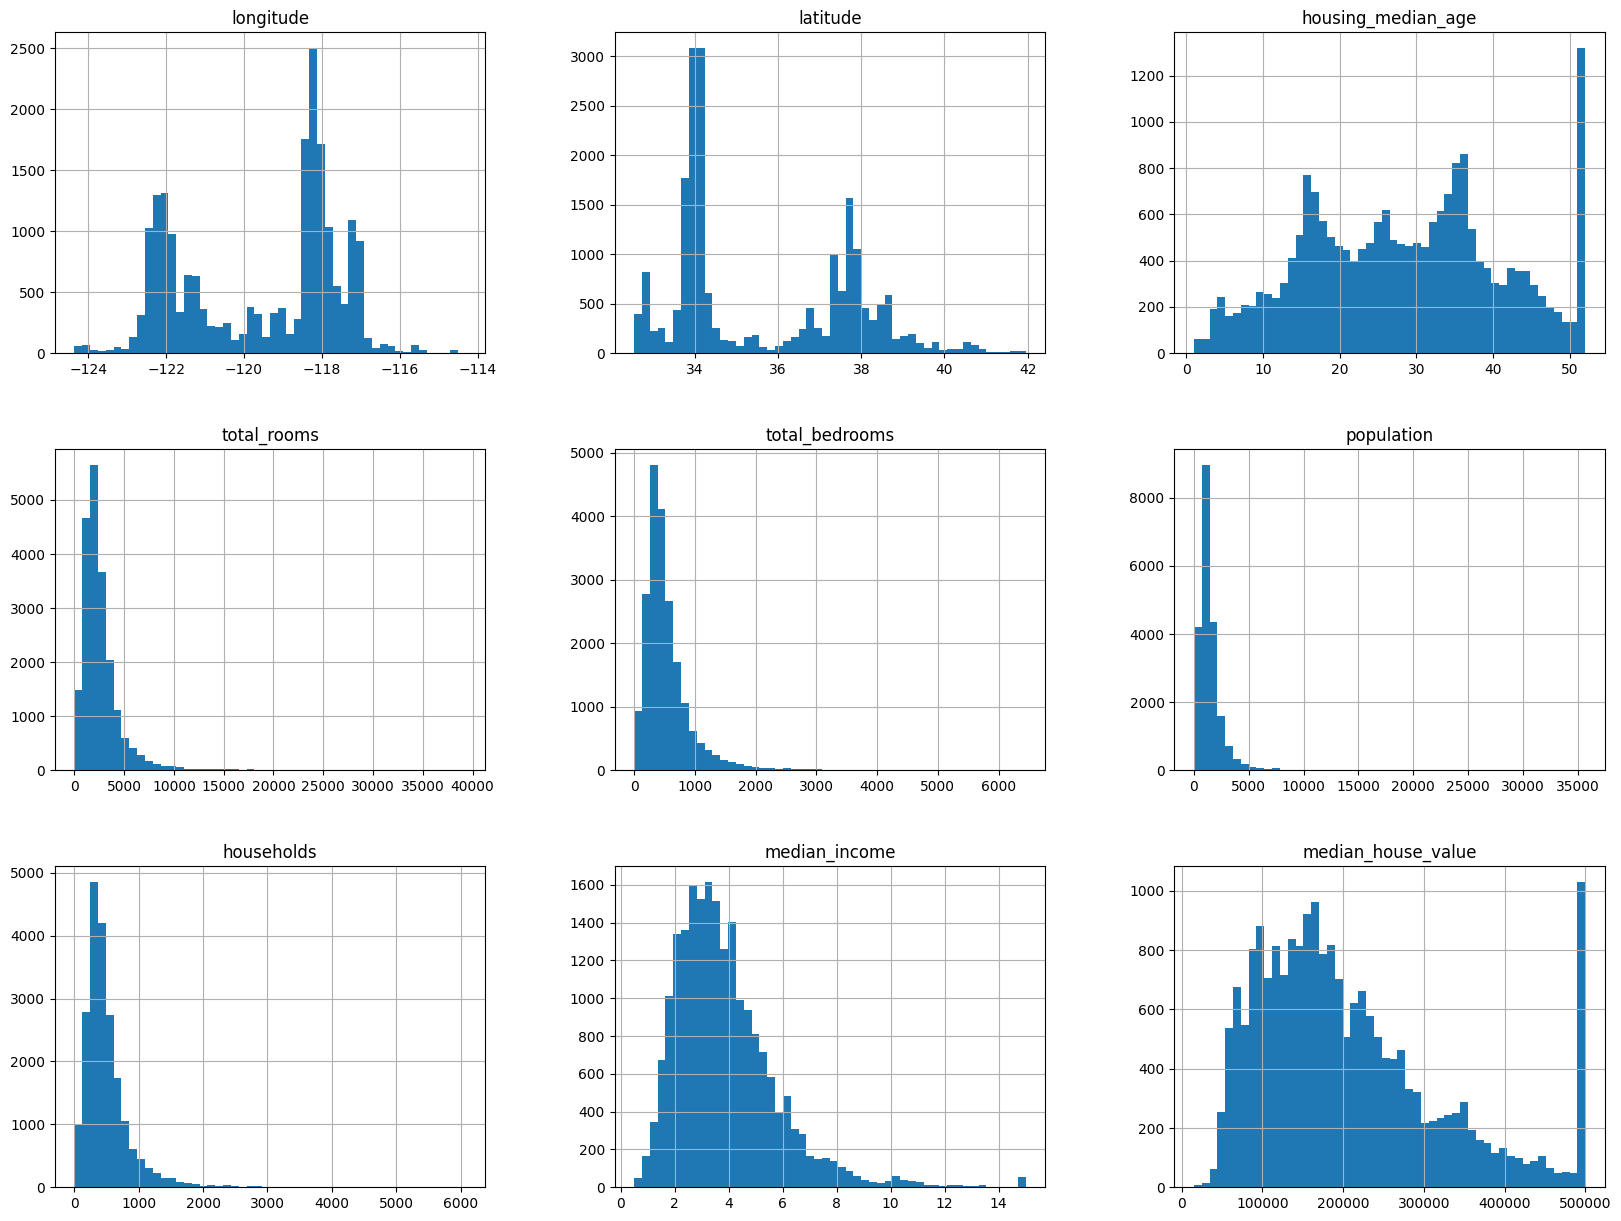

In [188]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

### Create a Test Set

In [189]:
import numpy as np

def shuffle_split_data(data, test_ratio):
    shuffled_indexes = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indexes = shuffled_indexes[:test_set_size]
    train_indexes = shuffled_indexes[test_set_size:]
    return data.iloc[train_indexes], data.iloc[test_indexes]

train_set, test_set = shuffle_split_data(housing, 0.2)
len(train_set), len(test_set)

(16512, 4128)

**Problem:** 
* Random train/test splitting can change with each run.
* Leads to data leakage over time as models eventually see all data.

**Stable Solution:** 
* Use a stable and unique identifier for each data instance. 
* Apply a hash function to determine test/train assignment.

In [190]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Use row index as a pseudo-identifier but the rows must never be deleted or reordered:

In [191]:
housing_with_id = housing.reset_index()  # Add an 'index' column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

Alternative build a Stable ID column combining latitude and longitude:

In [192]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

**Scikit-Learn** provides a convenient function to split data into training and test sets:

In [193]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

**Random Sampling**: good for large datasets, but risky with small ones (can cause bias).

**Stratified Sampling**: maintains the proportion of important features (e.g., income level).

Ensure the test set is representative of the income distribution in the full dataset to avoid bias when predicting median housing prices.

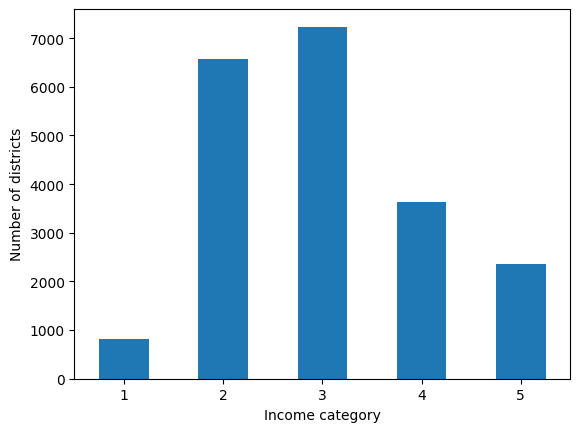

In [194]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3., 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

There is a function StratifiedShuffleSplit in Scikit-Learn that can be used to split the dataset into training and test sets while preserving the distribution of a specific feature (e.g., income category).

In [195]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append((strat_train_set_n, strat_test_set_n))

strat_train_set, strat_test_set = strat_splits[0]

Shorter way using `train_test_split()`:

In [196]:
strat_train_set, strat_test_set = train_test_split(housing, 
                                                  test_size=0.2, 
                                                  stratify=housing["income_cat"],
                                                  random_state=42)

Below are the proportions of income categories in the test set:

In [197]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Comparing income category proportions in the full dataset, stratified test set, and random test set shows the importance of stratified sampling for maintaining representative distributions:

In [198]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [199]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)  # Remove the income_cat column

---

# Explore and Visualize the Data to Gain Insights

Note: try to get insights from a field expert for these steps.
1. Create a copy of the data for exploration (sampling it down to a
manageable size if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured,
    etc.)
    * % of missing values
    * Noisiness and type of noise (stochastic, outliers, rounding errors,
    etc.)
    * Usefulness for the task
    * Type of distribution (Gaussian, uniform, logarithmic, etc.)
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply.
9. Identify extra data that would be useful (go back to “Get the Data”).
10. Document what you have learned.

**Recommendation**: Make a copy of the training data before performing transformations to preserve the original

In [200]:
housing = strat_train_set.copy()

### Visualizing Geographical Data
The dataset contains geographical data (latitude and longitude) that can be visualized to understand the distribution of the districts. We can use a scatter plot to visualize the districts based on their geographical coordinates.

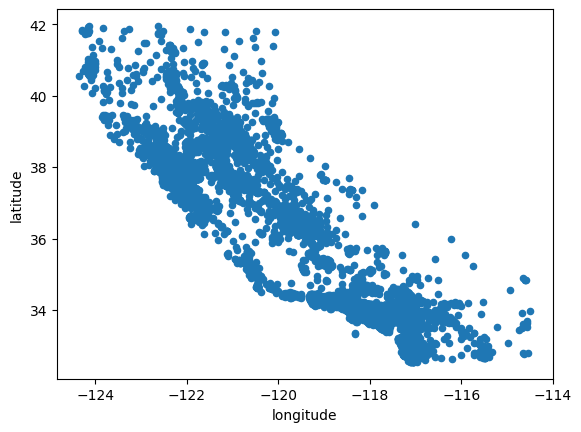

In [201]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

Adding transparency reveals data point density:

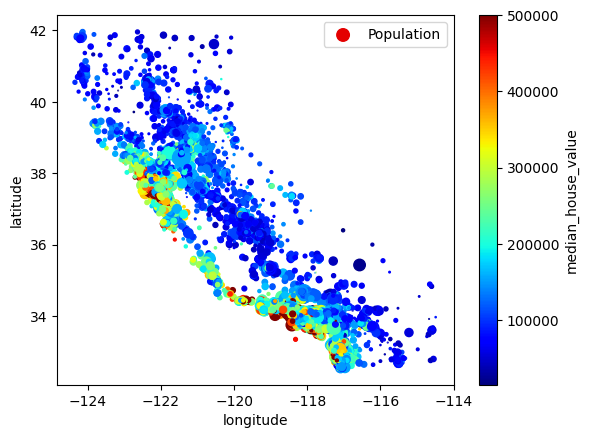

In [202]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             s=housing["population"]/100, # Each circle's size is proportional to the population
             label="Population", 
             c="median_house_value", # Color by median house value
             cmap="jet",
             colorbar=True)
plt.show()

### Look for Correlations
We can visualize the correlation between the features and the target variable (median house value) computing the *standard correlation coefficient* (Pearson's r) 

In [203]:
corr_matrix = housing.corr(numeric_only=True) # Compute the correlation matrix
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Interpreting Correlation Coefficient: 
* Range: –1 to 1

* Close to 1: Strong positive linear relationship

* Close to –1: Strong negative linear relationship

* Close to 0: No linear correlation

We select the most relevant attributes for further analysis and visualization. The correlation matrix helps us identify which features are most strongly correlated with the target variable (median house value).

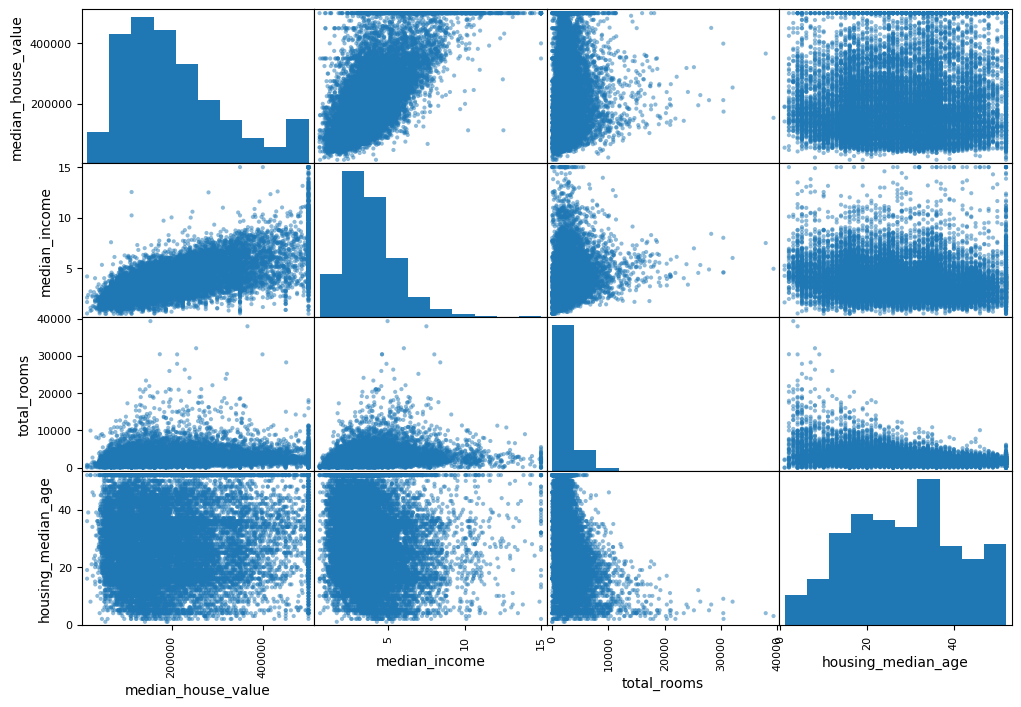

In [204]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

Strongest correlation: median_income vs median_house_value

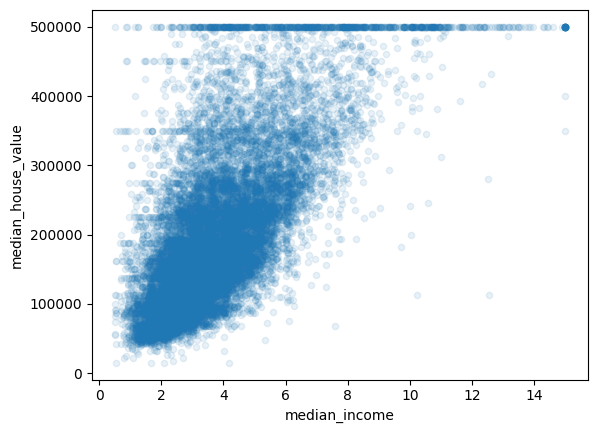

In [205]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

Observations: clear positive trend, price cap at $500,000 (visible horizontal line), other flat lines at ~$450k, ~$350k, ~$280k

Suggestion: Consider removing these to avoid misleading patterns

### Experimenting with Attributes Combinations
Looking at the correlation matrix, we can create new features that may improve our model's performance. For example, we can create features like `rooms_per_house`, `bedrooms_ratio`, and `people_per_house` to capture relationships between existing features.

In [206]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

---

# Prepare the Data for Machine Learning Algorithms

Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for five reasons:
    * So you can easily prepare the data the next time you get a fresh
    dataset
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    * To clean and prepare new data instances once your solution is live
    * To make it easy to treat your preparation choices as
    hyperparameters
1. Clean the data:
    * Fix or remove outliers (optional).
    * Fill in missing values (e.g., with zero, mean, median…) or drop
their rows (or columns).
2. Perform feature selection (optional):
    * Drop the attributes that provide no useful information for the task.
3. Perform feature engineering, where appropriate:
    * Discretize continuous features.
    * Decompose features (e.g., categorical, date/time, etc.).
    * Add promising transformations of features (e.g., log(x), sqrt(x), x^2,
etc.).
    * Aggregate features into promising new features.
4. Perform feature scaling:
    * Standardize or normalize features.

First, we reset to a Clean Set and separate the features from the target variable:

In [207]:
housing = strat_train_set.drop("median_house_value", axis=1)  # Drop the target variable
housing_labels = strat_train_set["median_house_value"].copy()  # Keep the target variable

## Clean the Data
**Problem:** Machine learning algorithms can't handle missing values, so missing data (e.g., total_bedrooms) must be addressed.
We have three options:
1. Remove the rows with missing values.


In [208]:
# housing.dropna(subset=["total_bedrooms"], inplace=True)

2. Remove the columns with missing values.

In [209]:
housing.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,1725.0,838.0,4.1455,<1H OCEAN


3. Fill in the missing values with a value (e.g., zero, mean, median, etc.). This called *imputation*.

In [210]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

/tmp/ipykernel_7246/2694038511.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


You decide to go for option 3 since it is the least destructive. There is a handy function in Scikit-Learn to do this:

In [211]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Using `SimpleImputer` ensures consistent handling of missing values across training, validation, test, and production data.

In [212]:
# Select only numerical columns for imputation
housing_num = housing.select_dtypes(include=[np.number])

# Fit the imputer on the training data
imputer.fit(housing_num)

# View the imputer's statistics
imputer.statistics_, housing_num.median().values

(array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
         408.    ,    3.5385]),
 array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
         408.    ,    3.5385]))

In [213]:
# Transform dataset (replace missing values):
X = imputer.transform(housing_num)

`sklearn.impute` offers more powerful imputation methods for numerical features:
* **KNNImputer**: Uses k-nearest neighbors to impute missing values based on similar instances.
* **IterativeImputer**: Models each feature with missing values as a function of other

---

## Scikit-Learn API Design Principles

CONSISTENCY

* **Estimators**: Learn parameters from data via `fit()`. Hyperparameters set in constructor.
* **Transformers**: Apply transformations with `transform()`. Provide `fit_transform()` as a shortcut.
* **Predictors**: Make predictions with `predict()`. Evaluate performance with `score()`.

INSPECTION

* **Hyperparameters**: Accessible as public instance variables (e.g., `imputer.strategy`).
* **Learned parameters**: Stored with an underscore suffix (e.g., `imputer.statistics_`).

NONPROLIFERATION OF CLASSES

* Use **NumPy arrays** or **SciPy sparse matrices** for datasets.
* Hyperparameters remain simple Python types (strings, numbers).

COMPOSITION

* Reuse existing components (e.g., build a `Pipeline` from transformers + an estimator).

SENSIBLE DEFAULTS

* Provides reasonable default values to allow quick prototyping.

---

Note: transformers output NumPy arrays (or SciPy sparse matrices), even if input is a Pandas DataFrame. Column names and index can be recovered by wrapping the result in a DataFrame.

In [214]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index= housing_num.index)

## Handling Text and Categorical Attributes

* Machine learning models need **numerical inputs**.
* Columns like **`ocean_proximity`** contain **text categories**, so they must be converted.



In [215]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


**Ordinal Encoding**

* Converts each category into an integer (e.g., `<1H OCEAN` → 0, `INLAND` → 1, …).
* Works fine when categories have a **natural order** (e.g., *bad < average < good < excellent*).

In [216]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [217]:
ordinal_encoder.categories_ # shows the categories

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

* Problem: for **unordered categories**, the model may wrongly assume that numbers close together mean similar categories.



**One-Hot Encoding**

* Creates **one binary column per category** (only one column is “hot” = 1 per row, others = 0).
* Avoids false assumptions about order or distance between categories.
* Returns a **sparse matrix** (efficient storage for mostly zeros).

In [218]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

Can convert to dense array via `.toarray()` or set `sparse=False`.

In [219]:
housing_cat_1hot.toarray()  

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [220]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

**Scikit-Learn vs Pandas**
* **`pandas.get_dummies()`:**

Generates columns only for categories present in the current DataFrame.

In [221]:
df_test = pd.DataFrame({"ocean_proximity":["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [222]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Can create different outputs if new/unseen categories appear.


In [223]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


**`OneHotEncoder`:**

  * Remembers the categories seen during training.
  * Ensures consistent feature order and number of columns.
  * Can raise an error or ignore unknown categories (`handle_unknown="ignore"`).
  * Better choice for production.

In [224]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

**Feature Names:**
* Estimators trained on DataFrames store input column names in `feature_names_in_`.
* They require consistent feature names for future `.transform()` or `.predict()`.
* Transformers (like `OneHotEncoder`) provide `get_feature_names_out()` to label the output columns.
* This enables building DataFrames from encoded outputs with clear, consistent feature names.

In [225]:
cat_encoder.feature_names_in_ # input columns names.

array(['ocean_proximity'], dtype=object)

In [226]:
cat_encoder.get_feature_names_out() # output columns names.

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [227]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


**High Cardinality Case**

* If there are **hundreds or thousands** of categories, one-hot encoding can blow up the feature space.
* Alternatives:

  * Replace categories with **meaningful numerical features** (e.g., distance to the ocean instead of `ocean_proximity`).
  * Use **special encoders** (e.g., from the `category_encoders` library).
  * In neural networks: use **embeddings** (compact learnable vectors).

## Feature Scaling and Transformation

Most machine learning algorithms perform poorly if the numerical features have **very different scales**.
Example from the housing dataset:

* `total_rooms` ranges from **6 to 39,320**
* `median_income` ranges from **0 to 15**

If we don’t scale, the model will tend to **ignore `median_income`** (small values) and give **too much weight to `total_rooms`** (large values).

TWO COMMON SCALING METHODS:


1. **Min-Max Scaling (Normalization)**

   * Rescales values into a specific range, usually **\[0,1]**.
   * Formula:

     $$
     x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}
     $$

   * Useful when we need a fixed range (e.g., neural networks often prefer inputs between –1 and 1).

    Problem: very sensitive to *outliers*. One extreme value can squash all other values into a tiny range.

In [228]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)


2. **Standardization (Z-score scaling)**

   * Transforms values to have:

     * Mean = 0
     * Standard deviation = 1
   * Formula:

     $$
     Z = \frac{x - \mu}{\sigma}
     $$

   * Advantage: **less sensitive to outliers** than min-max.
   * Does not constrain values to a fixed range, but often works better in practice.

In [229]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

⚠️ **Key rule**:
Always call `fit()` or `fit_transform()` **only on the training data**. Then use `.transform()` on validation, test, or new data.
Otherwise, you’d be leaking information from test into training.


🔹 ISSUES WITH HEAVY-TAILED DISTRIBUTIONS

When a feature has extreme values far from the mean (e.g., power-law distribution), both min-max scaling and standardization tend to **compress most values into a small interval**, making it hard for models.

Solutions:

1. **Mathematical transformations**:

   * Square root: `sqrt(x)`
   * Power transforms: `x^0.5`, `x^0.3`, etc.
   * Logarithm: `log(x)` → very useful for power-law distributions (e.g., population sizes).

   This makes the feature closer to a Gaussian (bell-shaped) distribution.

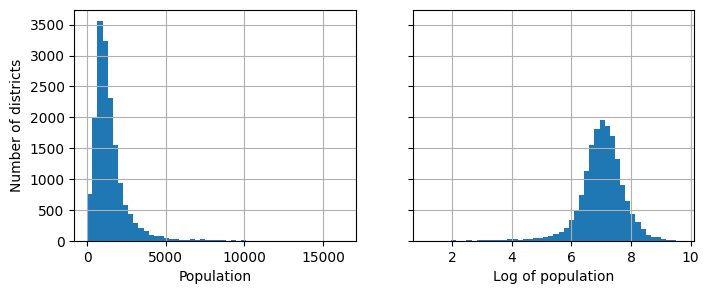

In [230]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

2. **Bucketizing (discretization)**

   * Split the range into intervals (buckets).
   * Replace each value with the bucket index or its percentile.
   * Produces a nearly uniform distribution → no need for scaling.

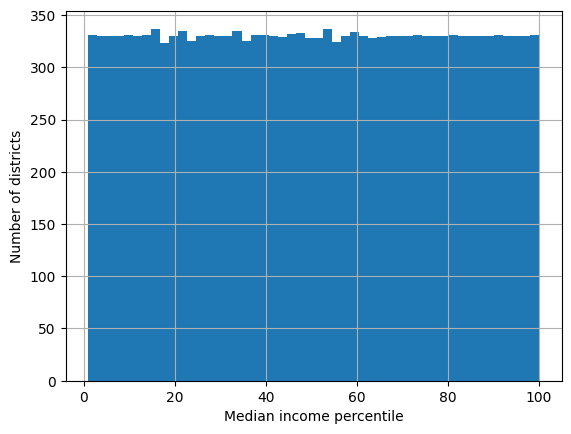

In [231]:
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

3. **Multimodal distributions (with multiple peaks)**

   * Example: `housing_median_age` with peaks at certain ages.
   * Strategies:

     * Bucketize and treat as categories (via OneHotEncoder).
     * Create **similarity features** for each mode.

       * Use Radial Basis Functions (RBF).
$$
\text{K}(x, c) = e^{-\gamma(x - c)^2}
$$

Example with Gaussian RBF centered at 35, c = 35:

In [232]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

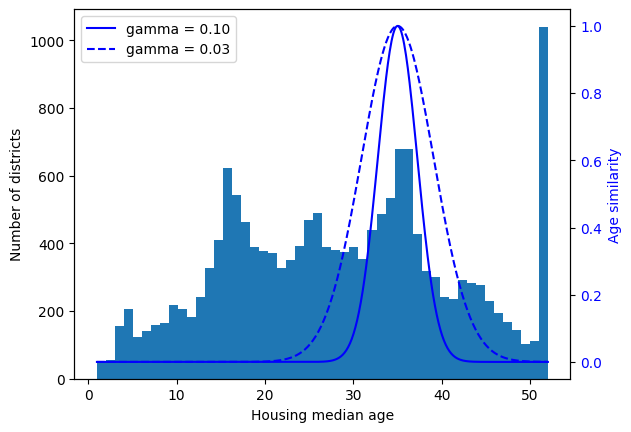

In [233]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

🔹 TRANSFORMING THE TARGET VARIABLE

Not only inputs—sometimes the target also needs transformation:

* If the target has a heavy tail → apply log transform.
* Or scale it with `StandardScaler`.

Example of scaling labels:

In [234]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)


Simpler way: use `TransformedTargetRegressor`:

In [235]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

## Custom Transformers

`FunctionTransformer` is a quick way to wrap a **pure function** (no training required) into a transformer that is compatible with scikit-learn’s `Pipeline`.
You should use it when the transformation:

* **Does not need to learn anything** from the training data (e.g., log transform, square root, simple ratios).
* Is a **direct operation** on rows/columns or a vectorized function on NumPy/Pandas arrays.


In [236]:
from sklearn.preprocessing import FunctionTransformer
t = FunctionTransformer(func=None, inverse_func=None, kw_args=None)

* `func`: the transformation function.
* `inverse_func`: optional, lets you reverse the transformation (useful for target transforms).
* `kw_args`: lets you pass extra arguments to `func`.

* **Log transform** (useful for heavy-tailed distributions, only if values > 0):

In [237]:
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

* **Function with parameters** (e.g. RBF kernel similarity with `gamma` and reference `Y`):

In [238]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

* **Column combination** (e.g. ratio col0 / col1):

In [239]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1.,2.],[3.,4.]]))

array([[0.5 ],
       [0.75]])

**WHEN TO WRITE A CUSTOM CLASS INSTEAD**

You need to implement a class if your transformer:

* **Learns parameters** during training (`fit()`), e.g. mean and std for scaling, cluster centers for KMeans.
* Uses **other estimators internally** in `fit()` (e.g. `KMeans`) and applies them in `transform()`.
* Needs to be fully compatible with `Pipeline`, `GridSearchCV`, or hyperparameter tuning (requires `get_params` / `set_params`).

**MINIMUM SCIKIT-LEARN TRANSFORMER API**

To be a valid transformer, your class must implement:

* `fit(self, X, y=None, ...)` → must return `self`. Learns parameters.
* `transform(self, X)` → applies the learned transformation.

Extras:

* Inherit from `TransformerMixin` → gives you `fit_transform()` for free (calls `fit()` then `transform()`).
* Inherit from `BaseEstimator` → gives you `get_params()` / `set_params()` (needed for tuning).
* Avoid `*args` and `**kwargs` in `__init__` if you want auto param handling.
* In `fit()`, set `n_features_in_` (and optionally `feature_names_in_` if input is a DataFrame).
* Implement `get_feature_names_out()` for output column names.
* Implement `inverse_transform()` if your transformation can be reversed.

Validation utilities:

* `check_array(X)` → ensures `X` is a proper float array.
* `check_is_fitted(self)` → raises error if `transform()` is called before `fit()`.

In [240]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True): # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None): # y is required even though we don't use it
        X = check_array(X) # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
        return self # always return self!

    def transform(self, X):
        check_is_fitted(self) # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

Example: `ClusterSimilarity` (KMeans + RBF kernel)

Idea:
* In `fit()`, train KMeans and store the cluster_centers_.
* In `transform()`, compute RBF similarity between each sample and all cluster centers.
* Output: a (*n_samples*, *n_clusters*) matrix.

In [241]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [242]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(
    housing[["latitude", "longitude"]],
    sample_weight=housing_labels
)

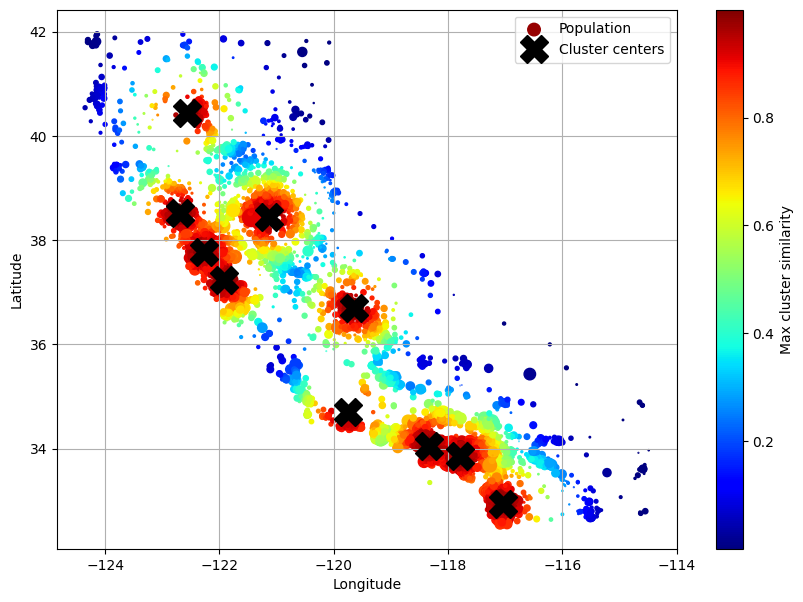

In [243]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()



## Transformation Pipelines

**What are *pipelines* for?**

Pipelines (`Pipeline` class in scikit-learn) let you chain transformations that must run in a specific order and treat them as a single estimator. Main benefits:

* Prevent mistakes (e.g., forgetting to impute before scaling).
* Keep your preprocessing workflow reproducible and compact.
* Simplify hyperparameter tuning (GridSearchCV can use the pipeline as one estimator).
* Avoid data leakage by ensuring all preprocessing is fitted only on the training set.


`Pipeline` — structure and behavior

In [244]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
  ("impute",  SimpleImputer(strategy="median")),
  ("standardize", StandardScaler()),
])

* The constructor takes a list of `(name, estimator)` tuples.
* **Name restrictions**: must be unique and cannot contain `__` (double underscores), because that separator is used when referencing nested parameters.
* **All steps except the last one** must be transformers (with `fit_transform()` / `transform()`); the last step can be either a transformer or a predictor.
* **How `fit()` works**: calls `fit_transform()` sequentially on each transformer (except the last one). For the last step: if it’s a transformer, `fit_transform()` is called; if it’s a predictor (no `fit_transform`), only `fit()` is called.
* The pipeline **exposes the same methods as the final estimator**: if the last step is a `StandardScaler`, the pipeline has `transform()`. If it’s a `RandomForestRegressor`, the pipeline has `predict()`.


`make_pipeline` (shortcut)

* `make_pipeline` generates names automatically (e.g., `"simpleimputer"`, `"standardscaler"`).
* If there are duplicates, sklearn adds suffixes (`foo-1`, `foo-2`).

In [245]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

**ACCESSING STEPS / SUB-PIPELINES**

* `pipeline[1]` → returns the second estimator.
* `pipeline[:-1]` → returns another `Pipeline` without the last step.
* `pipeline.steps` → list of `(name, estimator)` pairs.
* `pipeline.named_steps['simpleimputer']` → access by name.

Useful for inspection or parameter tuning.

In [246]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

`ColumnTransformer` — apply transformations per column

When your dataset has numerical and categorical columns and you want different preprocessing pipelines:

In [247]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]

cat_attribs = ["ocean_proximity"]
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", cat_pipeline, cat_attribs)])

* Each tuple is `(name, transformer, columns)`, where `columns` can be names or indices.
* `ColumnTransformer` applies each transformer to its columns and concatenates the results horizontally.
* **Special options**: use `"drop"` to remove columns, `"passthrough"` to leave them unchanged. The `remainder` parameter controls what happens to unspecified columns (default: dropped).
* If some transformers output sparse matrices (e.g., `OneHotEncoder`) and others dense, `ColumnTransformer` estimates the final density and returns sparse or dense depending on `sparse_threshold` (default 0.3). Watch out for memory usage.

AUTOMATIC COLUMN SELECTION

* `make_column_selector` selects columns by dtype (numerical, categorical).
* `make_column_transformer` auto-generates names (like `pipeline-1`, `pipeline-2`).

In [248]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
  (num_pipeline, make_column_selector(dtype_include=np.number)),
  (cat_pipeline, make_column_selector(dtype_include=object)),
)

GET FEATURE NAMES AFTER TRANSFORMATION

* `get_feature_names_out()` combines transformer names with column names (e.g., `log__total_rooms`, `cat__ocean_proximity_NEAR BAY`, `remainder__housing_median_age`).
* Works best if each transformer implements `get_feature_names_out`.

In [249]:
X_prepared = preprocessing.fit_transform(housing)
columns = preprocessing.get_feature_names_out()
df = pd.DataFrame(X_prepared, columns=columns, index=housing.index)

Custom transformers and `FunctionTransformer`

* To create new features (e.g., ratio `bedrooms_ratio = total_bedrooms / total_rooms`), use `FunctionTransformer`:


In [250]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder=default_num_pipeline) # one column remaining: housing_median_age


* Important: return a **2D array** (`(n_samples, n_new_features)`).

* `feature_names_out` lets you give meaningful names.

* For more complex transformations that need training (e.g., cluster similarity), create a custom transformer with `BaseEstimator` and `TransformerMixin`:


**BEST PRACTICES**

* **Always fit pipelines on training data only** to prevent leakage.
* **Check shapes**: transformers must keep the number of rows consistent.
* **Sparse vs dense**: watch memory usage; use `sparse_threshold` to control.
* **Naming**: choose descriptive names for steps, useful in parameter tuning.
* **Caching**: use `memory` in `Pipeline` to cache transformations and speed up cross-validation.
* **Visualization**: in Jupyter, use

In [251]:
from sklearn import set_config

set_config(display="diagram")

num_pipeline

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


---

# Select and Train a Model

Notes:
* If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or random forests).
* Once again, try to automate these steps as much as possible.

1. Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, random forest, neural net, etc.) using standard parameters.
2. Measure and compare their performance:
    * For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
3. Analyze the most significant variables for each algorithm.
4. Analyze the types of errors the models make:
    * What data would a human have used to avoid these errors?
5. Perform a quick round of feature selection and engineering.
6. Perform one or two more quick iterations of the five previous steps.
7. Shortlist the top three to five most promising models, preferring models that make different types of errors.

## Train and Evaluate on the Training Set

* Data is ready, split into **training set** and **test set**.
* A **preprocessing pipeline** is set up.
* Goal: **train and evaluate ML models** to predict housing values.

First Model: **Linear Regression**

In [252]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Initial predictions:

In [253]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2) # -2 = rounded to the nearest hundred

array([246000., 372700., 135700.,  91400., 330900.])

In [254]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

**We use RMSE on training set**

In [255]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions, )
lin_rmse

68972.88910758478

Result

* Predictions: some are close, but others are way off (error > \$200,000).
* RMSE ≈ **68,688**.
* Conclusion: **Underfitting** → the model is too simple.

Second Model: **Decision Tree**

In [256]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Evaluation on training set

In [257]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

Result

* Training RMSE = **0.0** → suspicious → clear **Overfitting**.

## Validation with **Cross-Validation**

In [258]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [259]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66551.139927
std       1110.386369
min      64607.896046
25%      66157.004240
50%      66308.879467
75%      66826.257468
max      68532.210664
dtype: float64

Decision Tree (CV) Results

```
mean ≈ 66,868
std ≈ 2,061
```

* Worse than it looked at first: performance similar to linear regression.
* Overfitting confirmed: **training error = 0, validation error ≈ 66k**.

Linear Regression with Cross-Validation

In [260]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(lin_rmses).describe()

count       10.000000
mean     70005.608228
std       4184.181111
min      65504.765753
25%      68174.168583
50%      68745.549757
75%      70347.617459
max      81044.631296
dtype: float64

Linear Regression (CV) Results

```
mean ≈ 69,858
std ≈ 4,182
```

* Slightly worse than the decision tree, but both models perform poorly.


Third Model: **Random Forest (Ensemble)**

In [261]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count       10.000000
mean     47052.156858
std       1014.215773
min      45495.976649
25%      46569.493712
50%      47117.033226
75%      47480.519175
max      49155.369239
dtype: float64

Random Forest (CV) Results

```
mean ≈ 47,020
std ≈ 1,034
```

* Much better than linear regression and decision trees.
* However, training RMSE ≈ **17,474** → still some **overfitting**.

Conclusions

* **Linear Regression** → too simple, high error → **underfitting**.
* **Decision Tree** → memorizes data, poor generalization → **overfitting**.
* **Random Forest** → much better performance, but still some overfitting.

---

# Fine-Tune the System

Notes:
* You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
* As always, automate what you can.

1. Fine-tune the hyperparameters using cross-validation:
    * Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you’re not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
    * Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors, as described by Jasper Snoek et al. ).
2. Try ensemble methods. Combining your best models will often produce better performance than running them individually.
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

WARNING
Don’t tweak your model after measuring the generalization error: you would just start
overfitting the test set.

## Grid Search

* Manually tuning **hyperparameters** is slow and tedious.
* With Scikit-Learn’s `GridSearchCV`, you can automate the search:

  * You specify which hyperparameters and values to try.
  * It uses **cross-validation** to evaluate every combination.
  * It selects the best-performing combination.


**Example:**

* A `Pipeline` is created with `preprocessing` and a `RandomForestRegressor`.
* In `param_grid`, you define the hyperparameter combinations to test:

  * `preprocessing__geo__n_clusters` (number of clusters in preprocessing).
  * `random_forest__max_features` (number of features considered at each split in the forest).
* Hyperparameters inside a pipeline step are accessed with `step_name__hyperparameter`.

In [262]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([("preprocessing", preprocessing), ("random_forest", RandomForestRegressor(random_state=42))])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10], 'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'preprocessing__geo__n_clusters': [5, 8, ...], 'random_forest__max_features': [4, 6, ...]}, {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6, 8, ...]}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"



**How it works internally:**

* It tries **all combinations** (e.g., 15 total).
* Each combination is trained and validated with 3-fold CV → 45 trainings in total.
* At the end, you can get:

  * `best_params_`: the best combination found.
  * `best_estimator_`: the pipeline retrained with those hyperparameters on the full training set.
  * `cv_results_`: all evaluation metrics for each combination.

In [263]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [264]:
grid_search.best_estimator_

,steps,"[('preprocessing', ...), ('random_forest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True



**Example results:**

* Best combination: `n_clusters=15`, `max_features=6`.
* RMSE improved from **47,019** (default hyperparameters) to **43,613** (with Grid Search).

In [265]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,42735,43708,44395,43613
13,15,8,43549,43820,44919,44096
6,10,4,43871,44036,44920,44276
9,10,6,43759,44163,44922,44282
7,10,6,43759,44163,44922,44282



**Key tips:**

1. Using a `Pipeline` lets you tune **both preprocessing and model hyperparameters** together.
2. If the best hyperparameter hits the max value tested, extend the range and search again.
3. With `refit=True` (default), the best model is retrained on the full training set at the end.
4. You can cache transformers to avoid recomputing expensive preprocessing steps in each run.

## Randomized Search

* **GridSearchCV** is good for small hyperparameter spaces, but it becomes impractical when there are many combinations.
* **RandomizedSearchCV** solves this by:

  * Trying a **fixed number of random combinations** instead of all possible ones.
  * Exploring a wider variety of values, especially useful when hyperparameters are continuous or have many options.
  * Avoiding wasted time on hyperparameters that don’t really affect performance.
  * Allowing you to choose how many iterations you want (flexible computation cost).

**How it works:**

* For each hyperparameter, you provide either:

  * A **list** of possible values.
  * Or a **probability distribution** (e.g., `randint`).
* Example:

In [266]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'preprocessing__geo__n_clusters': <scipy.stats....x757f5bf1aea0>, 'random_forest__max_features': <scipy.stats....x757f5ca50350>}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [267]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41375,42242,43133,42250
8,32,7,41832,42275,43250,42452
0,41,16,42276,42938,43304,42839
5,42,4,41885,43362,43621,42956
2,23,8,42524,42928,43752,43068


**Additional variants:**

* **HalvingRandomSearchCV** and **HalvingGridSearchCV**:

  * Start with many candidates trained with **limited resources** (e.g., on a subset of data or fewer iterations).
  * Keep only the best candidates for the next round.
  * Gradually allocate more resources to fewer candidates until the best ones remain.
  * This makes hyperparameter tuning **faster and more efficient**.

## Ensemble Methods

* The idea is to **combine several models** instead of relying on just one.
* The ensemble often performs **better than the best individual model**.
* Example: combine a **Random Forest** and a **K-Nearest Neighbors**, averaging their predictions.
* This works best when models make **different types of errors** (uncorrelated mistakes).


## Analyzing the Best Models and Their Errors

* Models are not only for predictions; they also help you **understand your data**.
* Example with **RandomForestRegressor**:

  * You can extract **feature importances** (`feature_importances_`).
  * This shows which variables matter most in the predictions.
  * You can sort features by importance and decide to:

    * Keep useful variables.
    * Drop irrelevant ones (e.g., some `ocean_proximity` categories).

In [268]:
final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.02, 0.01, 0.  , 0.01, 0.02,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.02, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [269]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(np.float64(0.18599734460509476), 'log__median_income'),
 (np.float64(0.07338850855844489), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06556941990883976), 'bedrooms__ratio'),
 (np.float64(0.053648710076725316), 'rooms_per_house__ratio'),
 (np.float64(0.04598870861894749), 'people_per_house__ratio'),
 (np.float64(0.04175269214442519), 'geo__Cluster 30 similarity'),
 (np.float64(0.025976797232869678), 'geo__Cluster 25 similarity'),
 (np.float64(0.023595895886342255), 'geo__Cluster 36 similarity'),
 (np.float64(0.02021056221732893), 'geo__Cluster 9 similarity'),
 (np.float64(0.01860691707666145), 'geo__Cluster 34 similarity'),
 (np.float64(0.018137988374628867), 'geo__Cluster 37 similarity'),
 (np.float64(0.01740435316632675), 'geo__Cluster 18 similarity'),
 (np.float64(0.016778386143844894), 'geo__Cluster 1 similarity'),
 (np.float64(0.015459009666188978), 'geo__Cluster 7 similarity'),
 (np.float64(0.015325731028175924), 'geo__Cluster 32 similarity'),
 (np.float64(0.0150737720150383

* The sklearn transformer `SelectFromModel` can **automatically drop the least useful features**.

**You should also:**

* Investigate **what errors your model makes** → check for outliers, missing or uninformative features.
* Check performance on **subsets of your data** (e.g., rural vs. urban, rich vs. poor).

  * This helps detect **biases**: if the model performs poorly on a group, it shouldn’t be deployed there.


## Evaluation on the Test Set

* After tuning, evaluate the model on the **test set** (never used before).

* Steps:

  * Split `X_test` and `y_test`.
  * Use `final_model` to predict.
  * Compute the **RMSE on test**.

In [270]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

41445.533268606625

* But a single number is not enough → compute a **confidence interval** (e.g., 95%) to estimate the error range.

  * Example: interval between **39,293 and 43,491**.

In [271]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([39293.55594722, 43491.1590655 ])


**Warning**: Heavy hyperparameter tuning can lead to overfitting on the validation set.

* Then, test performance may be worse than validation.
* Never tune hyperparameters based on the test set → that breaks generalization.

---

# Present Your Solution

1. Document what you have done.
2. Create a nice presentation:
    * Make sure you highlight the big picture first.
3. Explain why your solution achieves the business objective.
4. Don’t forget to present interesting points you noticed along the way:
    * Describe what worked and what did not.
    * List your assumptions and your system’s limitations.
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).

---

# Launch!

1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).
2. Write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops:
    * Beware of slow degradation: models tend to “rot” as data evolves.
    * Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
    * Also monitor your inputs’ quality (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale). This is particularly important for online learning systems.
3. Retrain your models on a regular basis on fresh data (automate as much as possible).

* Once approved, prepare your solution for **production**:

  * Clean/polish code.
  * Write documentation.
  * Add tests.
* **Save the trained model** (e.g., with `joblib.dump`) so it can be reloaded in production.
* Always keep backups of models, scores, and validation predictions for comparison.

In [272]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

* In production, **load the model** (`joblib.load`) and use `.predict()` for new data.

In [273]:
# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

**Deployment Options**

* **Web application integration** → model runs inside your backend (predict on user input).
* **REST API / microservice** → your model is served independently, easier to scale/upgrade.
* **Cloud deployment** (e.g., Google Vertex AI) → upload model file, deploy as a managed web service with load balancing and scaling.

**Monitoring the Model**

Deployment is **not the end** → you must monitor performance.

**Why monitoring matters**

* **Fast failures**: sudden system or pipeline breakage.
* **Slow decay (model rot)**: data changes over time, model becomes less relevant.

**Monitoring methods**

* **Automatic metrics**: e.g., in a recommender system, track how many suggested products are sold.
* **Human evaluation**: send samples of model outputs for review (e.g., experts, crowdsourcing, or even users).
* Use monitoring processes to **define actions** for failures and prepare recovery steps.


**Maintenance and Retraining**

If data evolves, models must be updated:

* **Automate retraining pipelines**:

  * Collect new labeled data regularly.
  * Run training + hyperparameter tuning scripts periodically.
  * Compare new vs. old model performance on updated test sets.
  * Deploy automatically only if performance improves.

* **Test on subsets** (e.g., rural vs. urban, rich vs. poor) to avoid biased performance.

* **Monitor input data quality**:

  * Detect missing features, unusual distributions, new categories.
  * Example: alert if a sensor sends random/noisy values.


**Backups and Rollbacks**

* Keep backups of **all models** and **datasets**:

  * Enables quick rollback if a new model fails.
  * Makes it possible to compare across versions.
  * Protects against corrupted or outlier-heavy data.


**MLOps (ML Operations)**

* This whole process (deployment, monitoring, automation, maintenance, rollbacks) is called **MLOps**.
* It usually requires **much more effort** than just building the model.
* But once the infrastructure is set up, moving from idea → production becomes much faster.